# <h1><center>**`Persoanl Loan Underwriting Model`**</center></h1>

### **`Problem Statement`**

Given a set of attributes for an Individual, determine if a credit line should be extended to them.This case study will focus on the underwriting process behind Personal Loan

- ### `How will the Online Financial Institution profit from this solution?`

 1.The Asset Department of this Online Financial Institution wants to build a model that will help them identify the potential     customers who have a higher probability of repaying the loan So that the given loan will not be NPA

 2. It will Increase the profitability of the company as well reduce the NPA Book.

 3. Also this model will help them in long run to avoid any condition likr Bankruptcy 

### Dataset
This dataset contains 396030 rows × 27 columns

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime,date
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_cumulative_gain as pcg
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('E:/Praxis/Project_Folder/Classification Proj/Classification Project/loan.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
# Shape of the dataset
print("No. of rows : ",df.shape[0])
print("No. of columns : ",df.shape[1])

No. of rows :  396030
No. of columns :  27


In [4]:
# Checking the distribution of the target label in terms of percentage
df['loan_status'].value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
# Statistical summary of the dataset
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [8]:
## separating numerical and categorical columns

categorical_col = df.select_dtypes(exclude=np.number).columns.tolist()
numerical_col = df.select_dtypes(include=np.number).columns.tolist()

In [9]:
## Dropping target from categorical field
categorical_col.remove('loan_status')

In [10]:
print('Categocical list : ', categorical_col)
print('Numerical list : ',numerical_col)

Categocical list :  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']
Numerical list :  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


#### Null value checking and Null value removal/Imputation

In [11]:
## null value checking
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

For 'Emp_length','Title','pub_rec_bankruptcies','emp_title' column the count of null value is less than or equal to 5%.

For mort_acc column the null value count is almost 9.54% which is significant.

In [12]:
## Droppping columns with null va;ues less than 5%
df.dropna(subset=['title','emp_length','revol_util','pub_rec_bankruptcies','emp_title'],inplace=True)

In [13]:
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())  ## as there is outlier

### Checking duplicates

In [14]:
## Checking Duplicate Value
df.duplicated().sum()

0

No Duplicate Value in Dataset

### Checking the distribution of the numerical data

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'mort_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

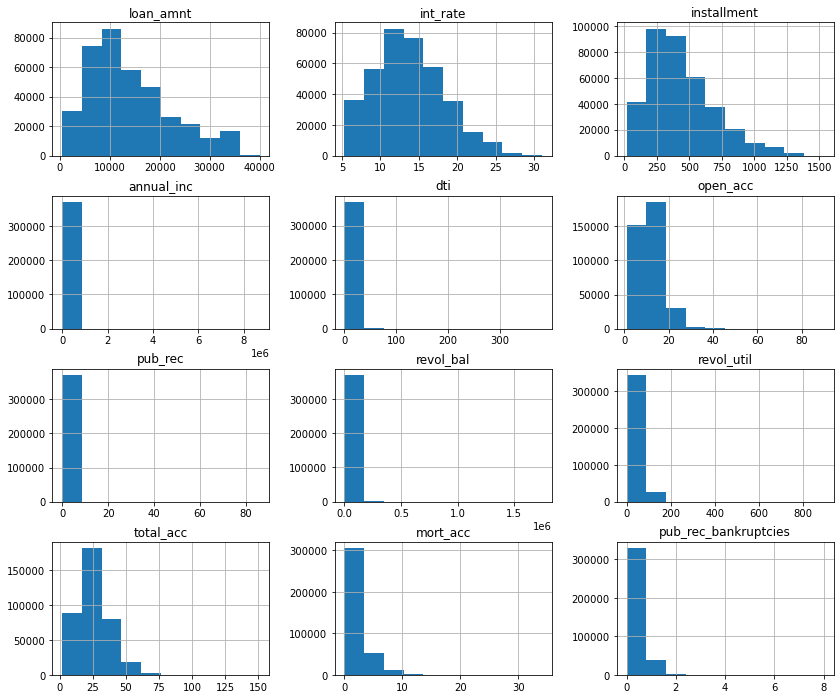

In [15]:
## Distribution of Numerical data
# Histogram using pandas 
df.hist(figsize=(14,12))

### Box Plot to see the outliers

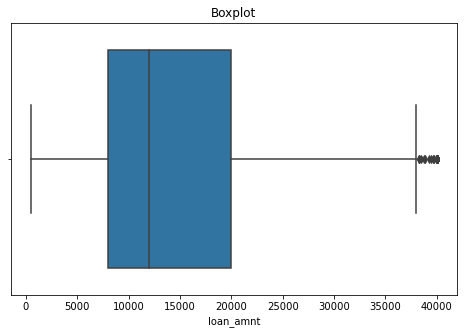

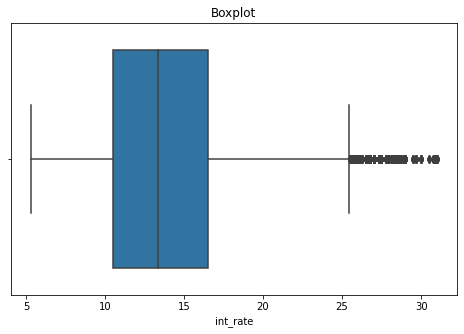

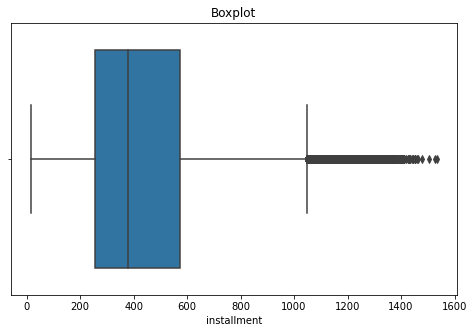

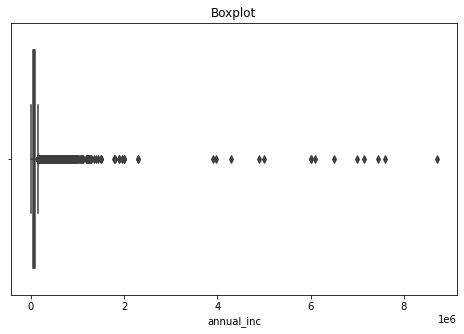

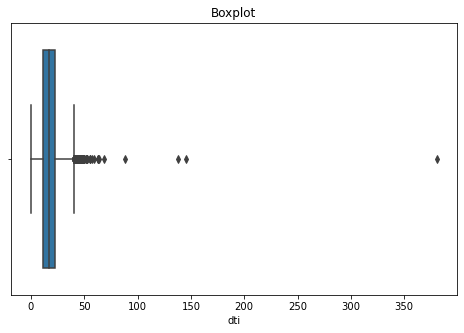

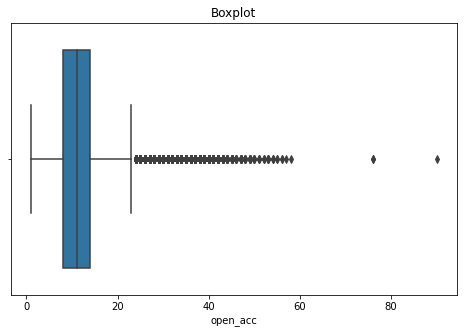

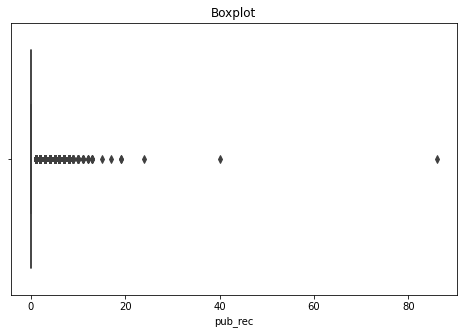

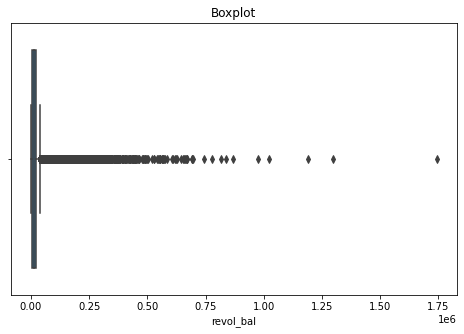

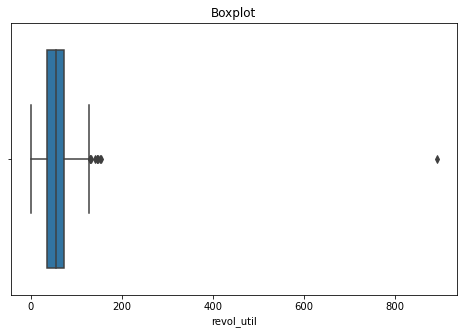

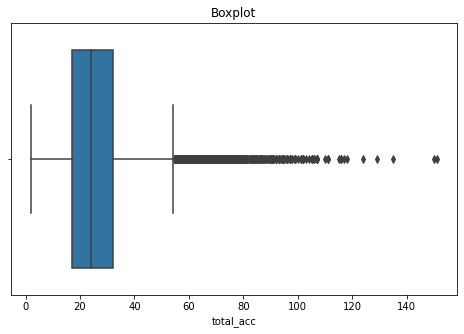

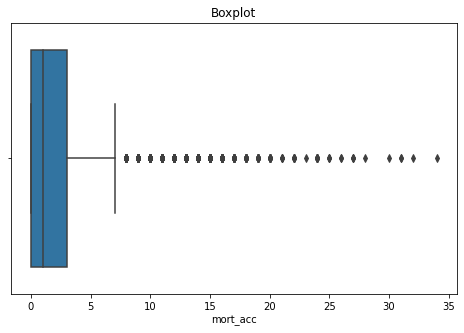

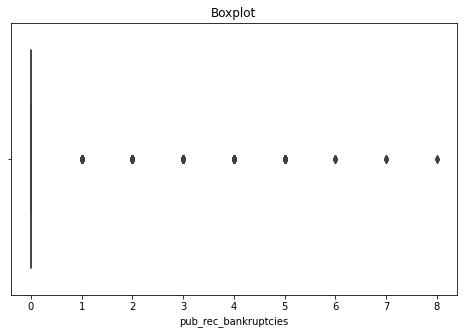

In [16]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()
    
for col in numerical_col:
    box_plot(col)

In [17]:
## Outlier Removal  ( also it make sthe distribution normal because datapoints will lie betweem  +-  3* standard deviation)
for col in numerical_col:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(338363, 27)

So almost (396030 - 338363) = 57667 data points have been removed as outlier 

array([[<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'installment'}>],
       [<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'open_acc'}>],
       [<AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>,
        <AxesSubplot:title={'center':'revol_util'}>],
       [<AxesSubplot:title={'center':'total_acc'}>,
        <AxesSubplot:title={'center':'mort_acc'}>,
        <AxesSubplot:title={'center':'pub_rec_bankruptcies'}>]],
      dtype=object)

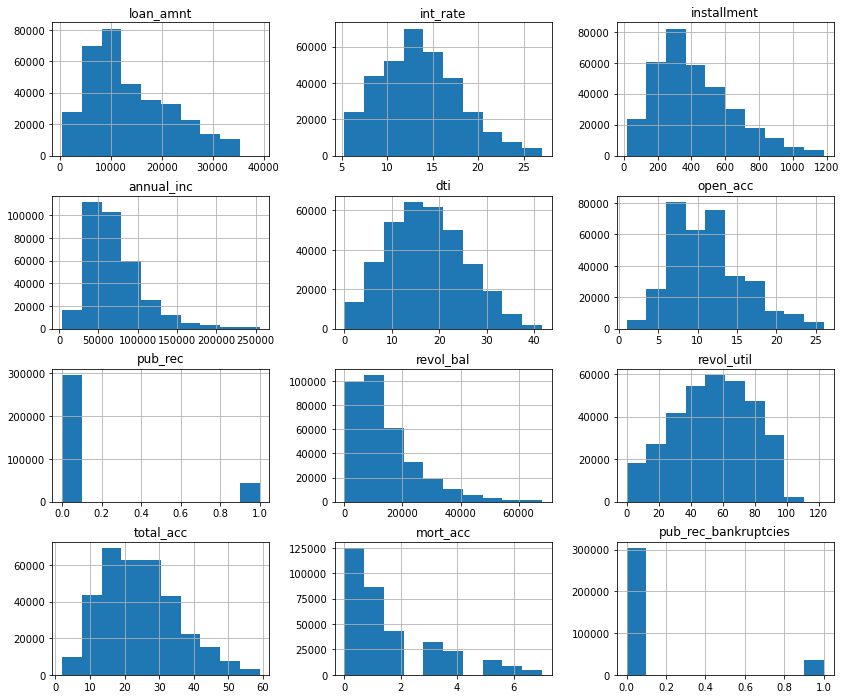

In [18]:
df.hist(figsize=(14,12))

In [19]:
## Skewness in data
for i in numerical_col:
    print(df[i].skew())

0.7547209515588945
0.39628616241359427
0.812498624274692
1.4952548578722116
0.23672358178756195
0.6945654248082656
2.2560169595063253
1.509905824107478
-0.18532375415733532
0.5622115728844638
1.1831121834641714
2.6290627960109774


### Data Exploration
The no. of people who have paid fully and the no. of people who are charged off

In [20]:
df['loan_status'].value_counts()

loan_status
Fully Paid     273241
Charged Off     65122
Name: count, dtype: int64

In [21]:
## Ownership type

df['home_ownership'].value_counts()

home_ownership
MORTGAGE    165390
RENT        142443
OWN          30399
OTHER          103
NONE            27
ANY              1
Name: count, dtype: int64

Majority are Mortgage and Rent

In [22]:
## Combining the none and any class with others

df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
df.home_ownership.value_counts()

home_ownership
MORTGAGE    165390
RENT        142443
OWN          30399
OTHER          131
Name: count, dtype: int64

In [23]:
## Converting the two column ( string data type) into datetime datatype

In [24]:
df[['issue_d','earliest_cr_line']]

,issue_d,earliest_cr_line
0,Jan-2015,Jun-1990
1,Jan-2015,Jul-2004
2,Jan-2015,Aug-2007
3,Nov-2014,Sep-2006
4,Apr-2013,Mar-1999
...,...,...
396025,Oct-2015,Nov-2004
396026,Feb-2015,Feb-2006
396027,Oct-2013,Mar-1997
396028,Aug-2012,Nov-1990


In [25]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [26]:
df[['issue_d','earliest_cr_line']]  ## converted into datetime

,issue_d,earliest_cr_line
0,2015-01-01,1990-06-01
1,2015-01-01,2004-07-01
2,2015-01-01,2007-08-01
3,2014-11-01,2006-09-01
4,2013-04-01,1999-03-01
...,...,...
396025,2015-10-01,2004-11-01
396026,2015-02-01,2006-02-01
396027,2013-10-01,1997-03-01
396028,2012-08-01,1990-11-01


In [27]:
df[['title','emp_title']]

,title,emp_title
0,Vacation,Marketing
1,Debt consolidation,Credit analyst
2,Credit card refinancing,Statistician
3,Credit card refinancing,Client Advocate
4,Credit Card Refinance,Destiny Management Inc.
...,...,...
396025,Debt consolidation,licensed bankere
396026,Debt consolidation,Agent
396027,pay off credit cards,City Carrier
396028,Loanforpayoff,"Gracon Services, Inc"


In [28]:
df['title'].value_counts()[:20]  ## some loan title is same but they are in upper and lower case letter

title
Debt consolidation           129795
Credit card refinancing       43572
Home improvement              12042
Other                         10839
Debt Consolidation            10410
Major purchase                 4021
Consolidation                  3415
debt consolidation             3104
Debt Consolidation Loan        2604
Medical expenses               2264
Business                       2201
Car financing                  1847
Credit Card Consolidation      1607
Vacation                       1473
Moving and relocation          1448
Personal Loan                  1414
consolidation                  1383
Consolidation Loan             1141
Home Improvement               1079
Credit Card Refinance          1004
Name: count, dtype: int64

In [29]:
df['title']=df.title.str.lower()

In [30]:
df['title'].value_counts()[:20]

title
debt consolidation           143732
credit card refinancing       43841
home improvement              13610
other                         10892
consolidation                  4920
major purchase                 4214
debt consolidation loan        3180
credit card consolidation      2357
medical expenses               2330
business                       2254
personal loan                  2184
car financing                  1868
credit card payoff             1708
consolidation loan             1644
credit card refinance          1641
vacation                       1599
moving and relocation          1452
consolidate                    1344
personal                       1315
loan                           1053
Name: count, dtype: int64

In [31]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Visualization of Data

#### Univariate analysis

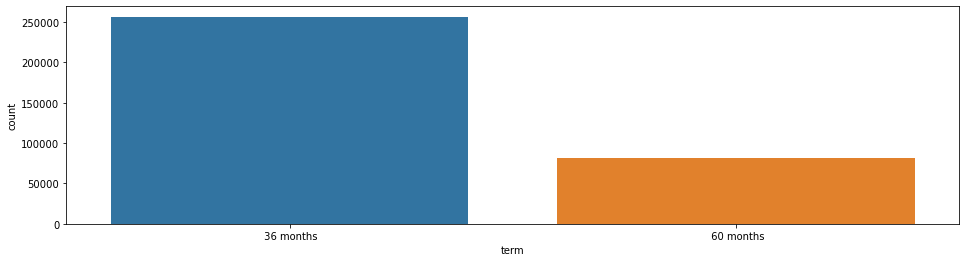

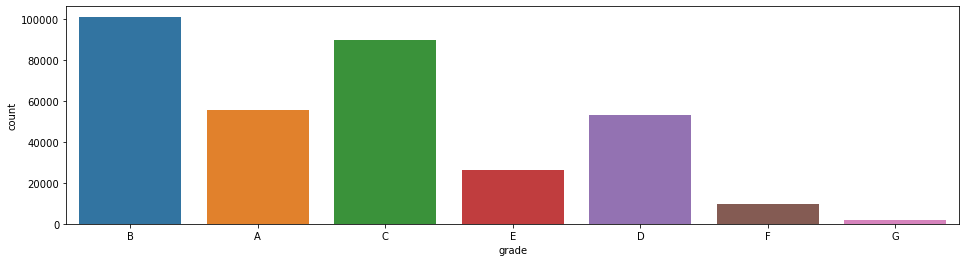

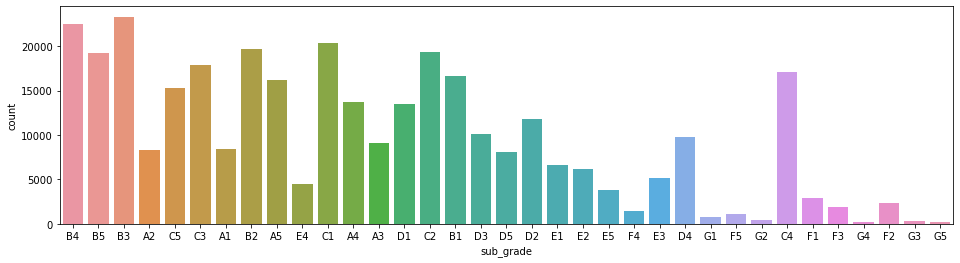

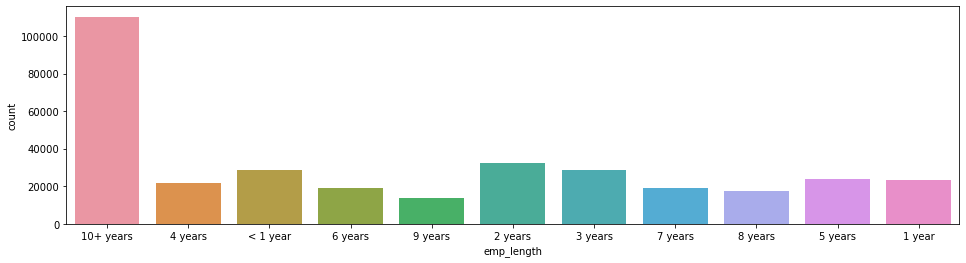

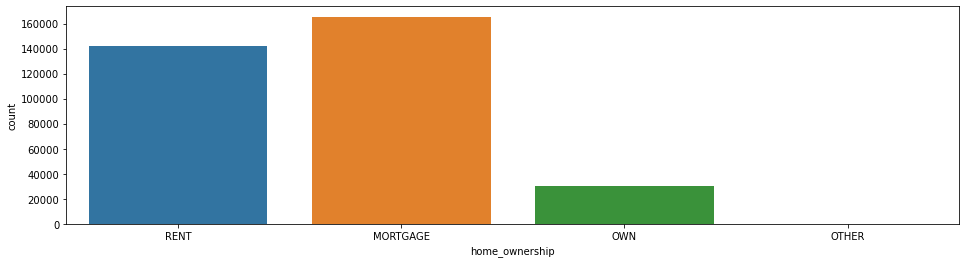

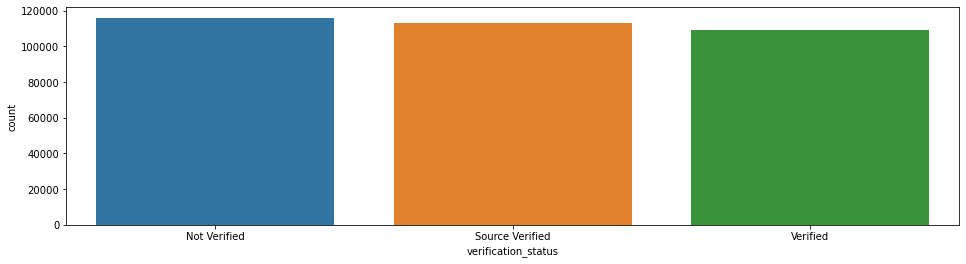

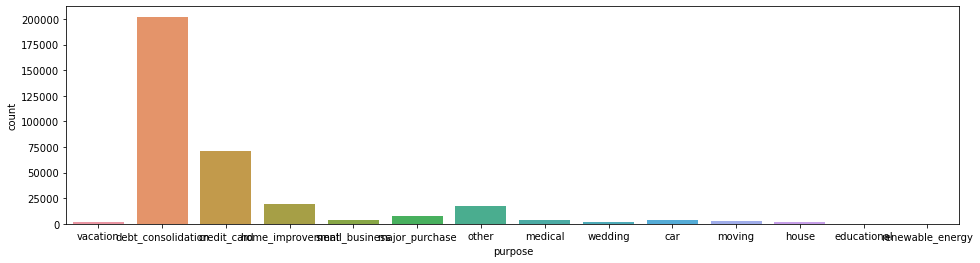

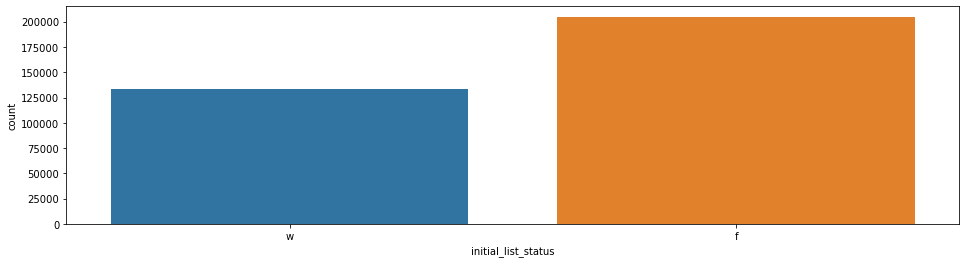

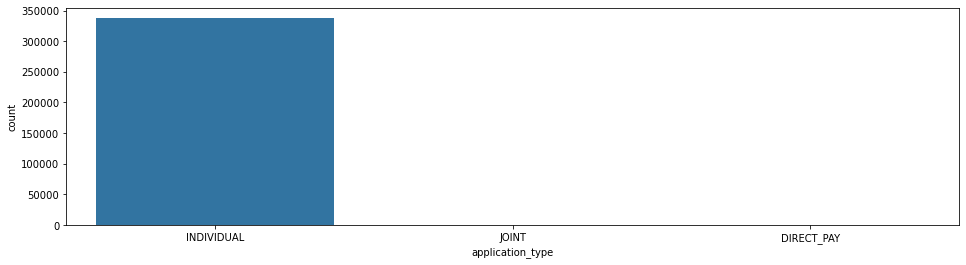

In [32]:
## count plots for some important categorical variable

not_included = ('emp_title', 'issue_d', 'title', 'earliest_cr_line', 'address')
for col in categorical_col:
    if col not in not_included:
        plt.figure(figsize=(16,4))
        sns.countplot(data=df, x=col)
        plt.show()

1. Most of the loan application is from Individual

2.The major purpose of availing loan is for debt_consolidated

3. Major loan applicant's home_ownership is mortagage 

4. The individual with 10+ years experience has availed the loan most

5. Most of the loan term is of 36 month and belongs to B-Grade customers (Given by the financial institution)

### Bivariate Analysis

[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

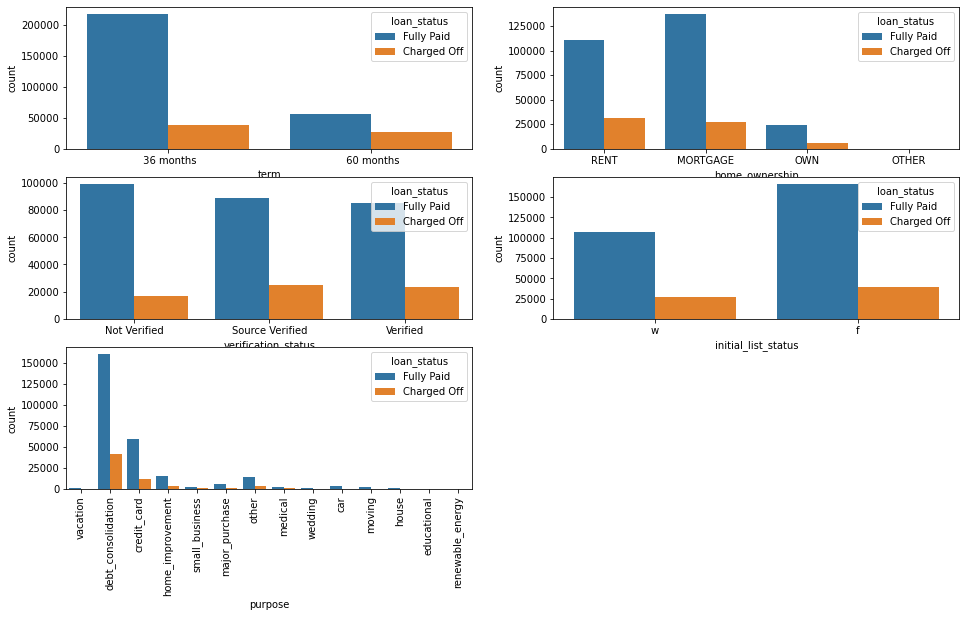

In [33]:
## Distribution of varoius category with respect to target variable (loan status)

plt.figure(figsize=(16,12))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(4,2,5)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

[Text(0, 0, 'A1'),
 Text(1, 0, 'A2'),
 Text(2, 0, 'A3'),
 Text(3, 0, 'A4'),
 Text(4, 0, 'A5'),
 Text(5, 0, 'B1'),
 Text(6, 0, 'B2'),
 Text(7, 0, 'B3'),
 Text(8, 0, 'B4'),
 Text(9, 0, 'B5'),
 Text(10, 0, 'C1'),
 Text(11, 0, 'C2'),
 Text(12, 0, 'C3'),
 Text(13, 0, 'C4'),
 Text(14, 0, 'C5'),
 Text(15, 0, 'D1'),
 Text(16, 0, 'D2'),
 Text(17, 0, 'D3'),
 Text(18, 0, 'D4'),
 Text(19, 0, 'D5'),
 Text(20, 0, 'E1'),
 Text(21, 0, 'E2'),
 Text(22, 0, 'E3'),
 Text(23, 0, 'E4'),
 Text(24, 0, 'E5'),
 Text(25, 0, 'F1'),
 Text(26, 0, 'F2'),
 Text(27, 0, 'F3'),
 Text(28, 0, 'F4'),
 Text(29, 0, 'F5'),
 Text(30, 0, 'G1'),
 Text(31, 0, 'G2'),
 Text(32, 0, 'G3'),
 Text(33, 0, 'G4'),
 Text(34, 0, 'G5')]

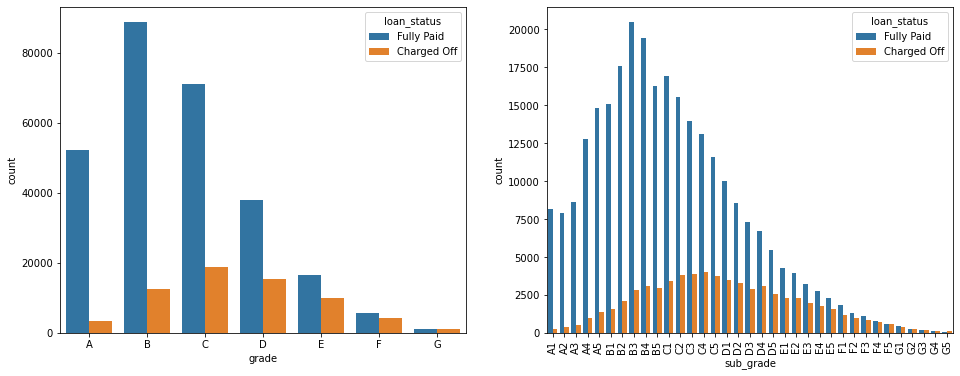

In [34]:
## ## Distribution of Grade and sub_grade (provided by the company) with respect to target variable
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(1, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

Most number of person who's loan become chargedoff is from Grade-C and subgrade C4

Most number of person who's loan is fully paid  is from Grade-B and subgrade B3

In [35]:
df.emp_length.value_counts()

emp_length
10+ years    110189
2 years       32534
< 1 year      28852
3 years       28635
5 years       23978
1 year        23553
4 years       21678
6 years       18937
7 years       18859
8 years       17309
9 years       13839
Name: count, dtype: int64

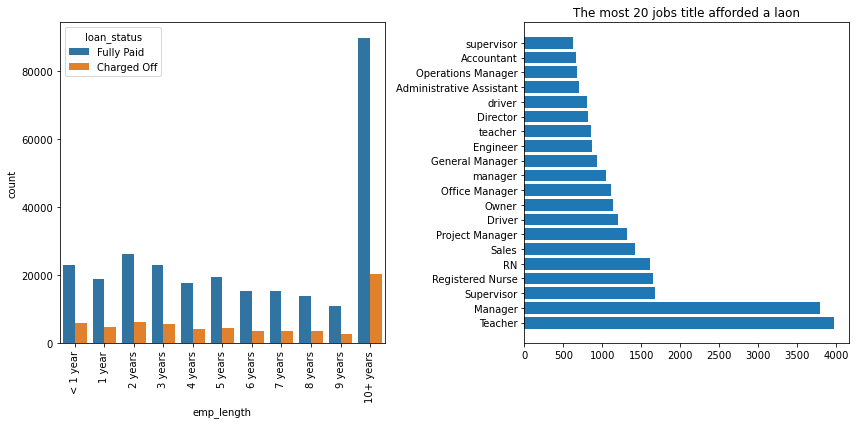

In [36]:

## Distribution of Emp_title and emp_length (provided) with respect to target variable
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.barh(df.emp_title.value_counts()[:20].index,df.emp_title.value_counts()[:20])
plt.title("The most 20 jobs title afforded a laon")
plt.tight_layout()

Applicant with occupation Teacher and manager has availed the loan most

### Some more data pre processing

In [37]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    303830
1.0     34533
Name: count, dtype: int64

In [38]:
df['mort_acc'].value_counts()

mort_acc
0.0    124992
1.0     86659
2.0     42737
3.0     31954
4.0     23185
5.0     14998
6.0      8981
7.0      4857
Name: count, dtype: int64

In [39]:
## making 'mort_acc' column value  as 1 where the number of mortgage account of loan applier is greater than or equal to 1 
## making 'pub_rec_bankruptcies' column from float to int

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,vacation,26.24,1990-06-01,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,credit card refinance,33.95,1999-03-01,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [41]:
## work on 'term' column 
df['term'].value_counts()

term
 36 months    256725
 60 months     81638
Name: count, dtype: int64

In [42]:
df['term'] = df['term'].apply(lambda x: x[:3])
df['term'].head()

0     36
1     36
2     36
3     36
4     60
Name: term, dtype: object

In [43]:
## work on 'initial_list_status' column 
df['initial_list_status'].value_counts()

initial_list_status
f    204876
w    133487
Name: count, dtype: int64

In [44]:
df['initial_list_status'] = df['initial_list_status'].map({'f':1 , 'w':0})

In [45]:
## Work on address column
df['address'].unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [46]:
## extracting the Pin code from the address column (last 5 strings)

df['Pin_Code'] = df['address'].apply(lambda x: x[-5:])
df['Pin_Code'].value_counts()

Pin_Code
70466    48607
30723    48355
22690    48233
48052    47853
00813    39262
29597    39021
05113    38998
93700     9380
11650     9370
86630     9284
Name: count, dtype: int64

In [47]:
df.drop(['address'],axis=1,inplace=True)

In [48]:
## extracting the age of credit line of the applier


df['age_of_credit'] = date.today().year - df['earliest_cr_line'].dt.year

##dropping 'earliest_cr_line'column
df.drop(['earliest_cr_line','issue_d'],axis=1,inplace=True)

In [49]:
df['age_of_credit'].dtype

dtype('int32')

In [50]:
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1 , 'Charged Off': 0})

### Checking Corelation between numerical variable

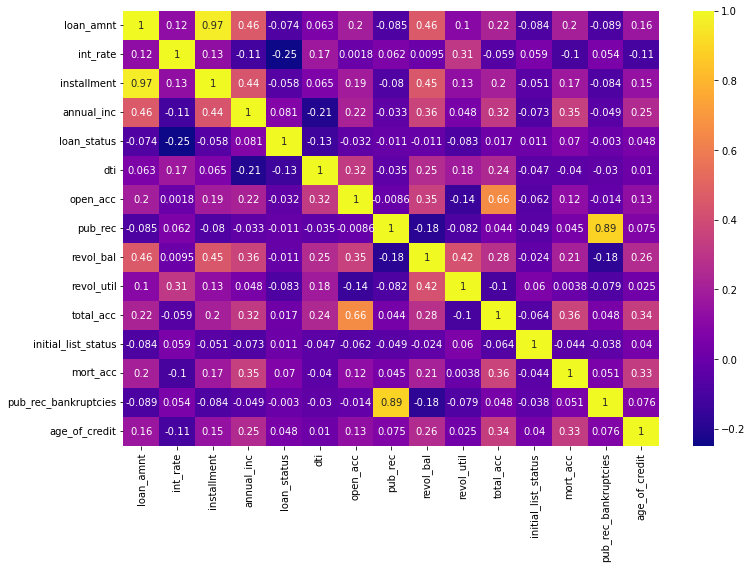

In [51]:
## checking correlation of Numerical variable
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(method='spearman',numeric_only=True),annot=True,cmap='plasma')
plt.show()

Here we can observe there is a perfect corelation between 'loan_amnt' and 'installment' column.

Also Perfect corelation between 'pub_rec' and 'pub_rec_bankruptcies'. We can frop one from this two also

In [52]:
df.drop(['installment','pub_rec'],axis=1,inplace=True)

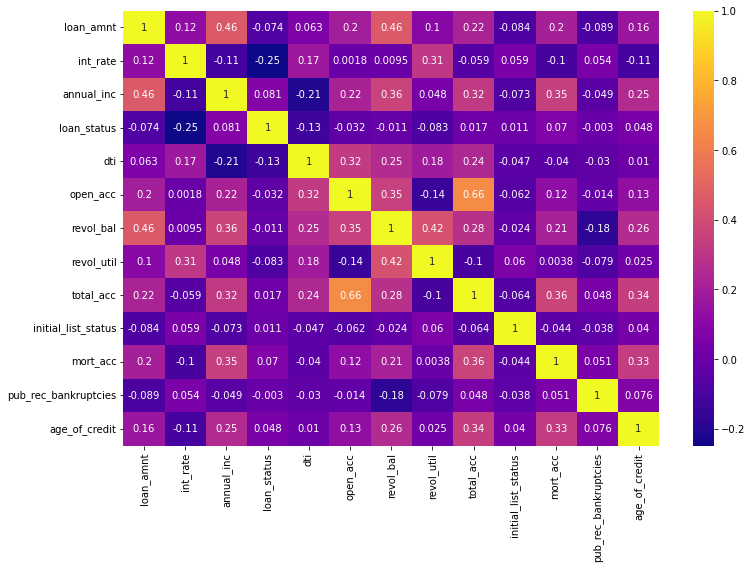

In [53]:
## Again Checking the corelation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman',numeric_only=True), annot=True, cmap='plasma')
plt.show()

In [54]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,Pin_Code,age_of_credit
0,10000.0,36,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,1,vacation,vacation,26.24,16.0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0,22690,33
1,8000.0,36,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,debt consolidation,22.05,17.0,20131.0,53.3,27.0,1,INDIVIDUAL,3.0,0.0,05113,19
2,15600.0,36,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,1,credit_card,credit card refinancing,12.79,13.0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0,05113,16
3,7200.0,36,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,1,credit_card,credit card refinancing,2.60,6.0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0,00813,17
4,24375.0,60,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,0,credit_card,credit card refinance,33.95,13.0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0,11650,24


In [55]:
vif_columns = pd.DataFrame(df.select_dtypes(include=np.number))
vif_columns

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,age_of_credit
0,10000.0,11.44,117000.0,1,26.24,16.0,36369.0,41.8,25.0,0,0.0,0.0,33
1,8000.0,11.99,65000.0,1,22.05,17.0,20131.0,53.3,27.0,1,3.0,0.0,19
2,15600.0,10.49,43057.0,1,12.79,13.0,11987.0,92.2,26.0,1,0.0,0.0,16
3,7200.0,6.49,54000.0,1,2.60,6.0,5472.0,21.5,13.0,1,0.0,0.0,17
4,24375.0,17.27,55000.0,0,33.95,13.0,24584.0,69.8,43.0,1,1.0,0.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,40000.0,1,15.63,6.0,1990.0,34.3,23.0,0,0.0,0.0,19
396026,21000.0,12.29,110000.0,1,21.45,6.0,43263.0,95.7,8.0,1,1.0,0.0,17
396027,5000.0,9.99,56500.0,1,17.56,15.0,32704.0,66.9,23.0,1,0.0,0.0,26
396028,21000.0,15.31,64000.0,1,15.88,9.0,15704.0,53.8,20.0,1,5.0,0.0,33


In [56]:
df.drop(columns=vif_columns.columns,axis = 1,inplace = True)

In [57]:
## checking Multicolinearity using VIF
def calc_vif(vif_columns):
    vif=pd.DataFrame()
    vif['Feature']=vif_columns.columns
    vif['VIF']=[variance_inflation_factor(vif_columns.values,i) for i in range(vif_columns.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif
calc_vif(vif_columns)[:5]

,Feature,VIF
8,total_acc,13.57
5,open_acc,13.46
12,age_of_credit,12.83
1,int_rate,11.13
7,revol_util,8.34


In [58]:
vif_columns.drop(columns=['total_acc','open_acc','age_of_credit','int_rate'],axis=1,inplace=True)
calc_vif(vif_columns)[:5]

,Feature,VIF
1,annual_inc,6.50
5,revol_util,6.01
0,loan_amnt,5.47
3,dti,4.88
2,loan_status,4.10


In [59]:
df = pd.concat([df,vif_columns], axis=1)

In [60]:
df.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,title,application_type,Pin_Code,loan_amnt,annual_inc,loan_status,dti,revol_bal,revol_util,initial_list_status,mort_acc,pub_rec_bankruptcies
0,36,B,B4,Marketing,10+ years,RENT,Not Verified,vacation,vacation,INDIVIDUAL,22690,10000.0,117000.0,1,26.24,36369.0,41.8,0,0.0,0.0
1,36,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,debt_consolidation,debt consolidation,INDIVIDUAL,05113,8000.0,65000.0,1,22.05,20131.0,53.3,1,3.0,0.0
2,36,B,B3,Statistician,< 1 year,RENT,Source Verified,credit_card,credit card refinancing,INDIVIDUAL,05113,15600.0,43057.0,1,12.79,11987.0,92.2,1,0.0,0.0
3,36,A,A2,Client Advocate,6 years,RENT,Not Verified,credit_card,credit card refinancing,INDIVIDUAL,00813,7200.0,54000.0,1,2.60,5472.0,21.5,1,0.0,0.0
4,60,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,credit_card,credit card refinance,INDIVIDUAL,11650,24375.0,55000.0,0,33.95,24584.0,69.8,1,1.0,0.0


### one hot encoding and Target encoding on categorical columns

In [61]:
one_hot_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
                'purpose', 'initial_list_status', 'application_type','Pin_Code']

In [62]:
df_new = pd.get_dummies(df[one_hot_cols],drop_first=True,dtype=int)

In [63]:
df = pd.concat([df_new, df], axis=1)
df.drop(columns=one_hot_cols, axis=1, inplace=True)

In [64]:
df['emp_title'].nunique() , df['title'].nunique()

(161313, 36743)

In [65]:
## For high cardinality in 'emp_title' and 'title' column here Target Encoding is used

In [66]:
df['emp_title'] = df['emp_title'].map(df.groupby('emp_title')['loan_status'].mean())

In [67]:
df['title'] = df['title'].map(df.groupby('title')['loan_status'].mean())

In [68]:
df.head()

,term_ 60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,Pin_Code_05113,Pin_Code_11650,Pin_Code_22690,Pin_Code_29597,Pin_Code_30723,Pin_Code_48052,Pin_Code_70466,Pin_Code_86630,Pin_Code_93700,emp_title,title,loan_amnt,annual_inc,loan_status,dti,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0.753086,0.806754,10000.0,117000.0,1,26.24,36369.0,41.8,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.666667,0.779339,8000.0,65000.0,1,22.05,20131.0,53.3,3.0,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0.888889,0.812162,15600.0,43057.0,1,12.79,11987.0,92.2,0.0,0.0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.000000,0.812162,7200.0,54000.0,1,2.60,5472.0,21.5,0.0,0.0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0.000000,0.890920,24375.0,55000.0,0,33.95,24584.0,69.8,1.0,0.0


In [69]:
## Now splitting the data
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [70]:
## splitting the data into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=123)

In [71]:
## standardizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
X_train.shape,y_train.shape

((226703, 89), (226703,))

In [73]:
X_test.shape , y_test.shape

((111660, 89), (111660,))

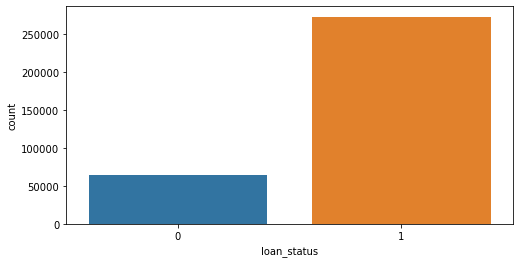

In [74]:
## checking the calss distribution of target 
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='loan_status')
plt.show()

Dataset is Imbalanced as the count of class 1 is much more than 0

### Oversampling the imbalanced dataset

In [75]:
#pip install imblearn

In [76]:
#pip install -U threadpoolctl

In [77]:
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train.ravel())

In [78]:
print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of X_train: (366226, 89)
After OverSampling, the shape of y_train: (366226,) 

After OverSampling, counts of label '1': 183113
After OverSampling, counts of label '0': 183113


### Model Buliding

#### Logistic Regression

In [79]:
## Model Building (Logistic Regression)

logis = LogisticRegression()
logis.fit(X_train, y_train)
y_pred = logis.predict(X_test)

print('training score :', logis.score(X_train, y_train))
print('accuracy score :',logis.score(X_test,y_test))

training score : 0.9190445244193476
accuracy score : 0.9199176070213148


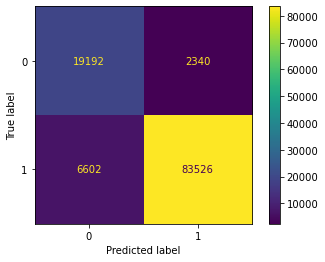

In [80]:
confusion_matrix_lr=confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = logis.classes_)

cm_display.plot()
plt.show()

1) Here the charged off case is assumed as 0 and fully paid 1

2) For loan modelling problem (where on basis of the data the institution decides whether the credit line should be extended to the customer or not)we always try to reduce the false postive value because it is more dangerous (Chance of getting NPA) than loosing some potential customer and loosing interest(which is also not good for the financial institute).

3) So here we try to decrease the mis classification of the charged off class more effectively.

4) we also want to decrease the mis classification of the fullypaid class as well because no financial institute wants to loose interest income.

In [81]:
#Here specificity should be higher because misclassification on 'writeoff' label should be lower 

specificity = confusion_matrix_lr[0][0]/(confusion_matrix_lr[0][0]+confusion_matrix_lr[0][1])
specificity

0.8913245402192086

In [82]:
print("precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred)) ## sensitivity
print("f1_score : ",f1_score(y_test,y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

precision_score :  0.9727482356229474
recall_score :  0.9267486241789455
f1_score :  0.9491914497085129
accuracy_score :  0.9199176070213148


In [83]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81     21532
           1       0.97      0.93      0.95     90128

    accuracy                           0.92    111660
   macro avg       0.86      0.91      0.88    111660
weighted avg       0.93      0.92      0.92    111660



In [84]:
## Checking overfitting in the model using CV score

k_folds = KFold(n_splits = 10)

scores = cross_val_score(logis, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.86485208 0.82445252 0.80491769 0.80996572 0.808488   0.80836978
 0.80757182 0.80636009 0.80751271 0.86056271]
Average CV Score:  0.8203053132098915
Number of CV Scores used in Average:  10


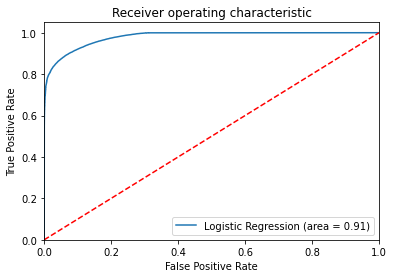

In [85]:
## AUC-ROC Curve (Logistic Regression)

logit_roc_auc=roc_auc_score(y_test,logis.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logis.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

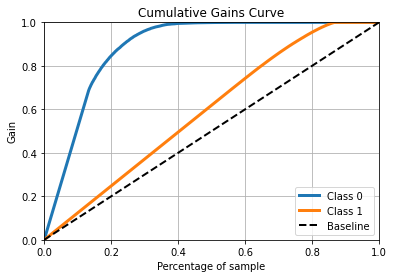

In [86]:
## Lift Curve
logis_lift = logis.predict_proba(X_test)
pcg(y_test, logis_lift)
plt.show()

### NaiveBayes Classifier

In [87]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

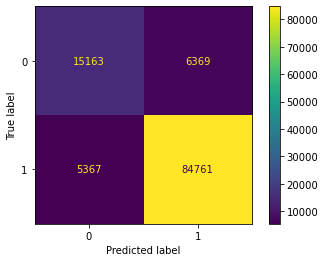

In [88]:
confusion_matrix_nb=confusion_matrix(y_test,y_pred)
cm_display_nb = ConfusionMatrixDisplay(display_labels=nb.classes_,confusion_matrix=confusion_matrix_nb)

cm_display_nb.plot()
plt.show()

In [89]:
#Here specificity should be higher because misclassification on 'charged off' label should be lower.It is more important

specificity = confusion_matrix_nb[0][0]/(confusion_matrix_nb[0][0]+confusion_matrix_nb[0][1])
specificity

0.7042076908786922

In [90]:
# By Gaussian Nb the misclassification in fullypaid class is very high 
sensitivity = confusion_matrix_nb[1][1]/(confusion_matrix_nb[1][1]+confusion_matrix_nb[1][0])
sensitivity

0.9404513580685248

In [91]:
print('training score :', nb.score(X_train, y_train))
print("precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred)) ## sensitivity
print("f1_score : ",f1_score(y_test,y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

training score : 0.8181641936946039
precision_score :  0.9301108306814441
recall_score :  0.9404513580685248
f1_score :  0.93525251299253
accuracy_score :  0.8948952176249328


In [92]:
report_nb = classification_report(y_test,y_pred)
print(report_nb)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72     21532
           1       0.93      0.94      0.94     90128

    accuracy                           0.89    111660
   macro avg       0.83      0.82      0.83    111660
weighted avg       0.89      0.89      0.89    111660



In [93]:
## Checking overfitting in the model using CV score

k_folds = KFold(n_splits = 10)

scores = cross_val_score(nb, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81121258 0.81195141 0.80784348 0.8129507  0.81141388 0.81123655
 0.81067502 0.80922686 0.81061591 0.80798558]
Average CV Score:  0.8105111981100691
Number of CV Scores used in Average:  10


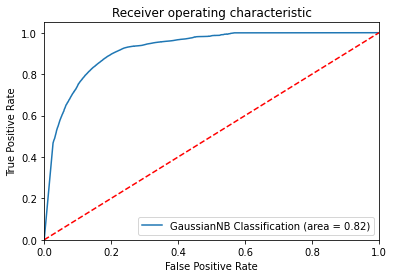

In [94]:
## AUC-ROC Curve (Naivebayes Classifier)

Naive_roc_auc=roc_auc_score(y_test,nb.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='GaussianNB Classification (area = %0.2f)' % Naive_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

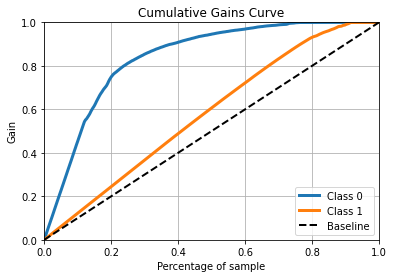

In [95]:
## Lift Curve
Naive_lift = nb.predict_proba(X_test)
pcg(y_test, Naive_lift)
plt.show()

### KNN Classifier

In [96]:
## selecting Top features
etr_model = ExtraTreesClassifier()
etr_model.fit(X,y)
etr_model.feature_importances_

array([1.44313716e-02, 3.48955633e-03, 2.43298411e-03, 4.19061015e-03,
       6.13830095e-03, 3.95155111e-03, 8.14160311e-04, 7.67730267e-04,
       6.85033946e-04, 1.06226244e-03, 1.22054877e-03, 8.66744618e-04,
       9.36851214e-04, 1.06031418e-03, 1.04962382e-03, 9.28571808e-04,
       1.36475627e-03, 1.48522655e-03, 1.56959723e-03, 1.55775987e-03,
       1.44274978e-03, 1.29252475e-03, 1.36756809e-03, 1.30728442e-03,
       1.38396636e-03, 1.26003156e-03, 1.04289854e-03, 1.19137192e-03,
       1.13639223e-03, 9.09173546e-04, 8.44664001e-04, 4.84730717e-04,
       5.34481339e-04, 4.52652869e-04, 4.38567043e-04, 3.94368676e-04,
       2.34279344e-04, 1.48851251e-04, 1.25630291e-04, 9.10614411e-05,
       8.07900820e-05, 6.79185590e-03, 4.59045227e-03, 4.31939508e-03,
       3.61086086e-03, 3.85014716e-03, 3.31662620e-03, 3.45807982e-03,
       3.31084486e-03, 2.95824467e-03, 4.35425071e-03, 4.96975788e-05,
       4.24042283e-03, 6.36780644e-03, 6.41210844e-03, 6.35421506e-03,
      

<AxesSubplot:>

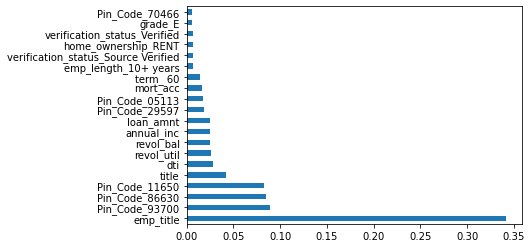

In [97]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [98]:
x1_new = df[['emp_title','Pin_Code_86630','Pin_Code_11650','Pin_Code_93700','title','dti','revol_bal','revol_util','annual_inc','loan_amnt']]

In [99]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_new,y,test_size=0.33,random_state=123)

In [100]:
## choosing the optimal value of K
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    y_pred = knn.predict(x1_test)
    error_rate.append(np.mean(y_pred != y1_test))

In [101]:
error_rate

[0.3024628336020061,
 0.3891277091169622,
 0.24768941429339064,
 0.28715744223535733,
 0.22430592871216193,
 0.24517284614006807,
 0.21276195593766792,
 0.22562242521941608,
 0.20638545584811033]

Text(0, 0.5, 'Error Rate')

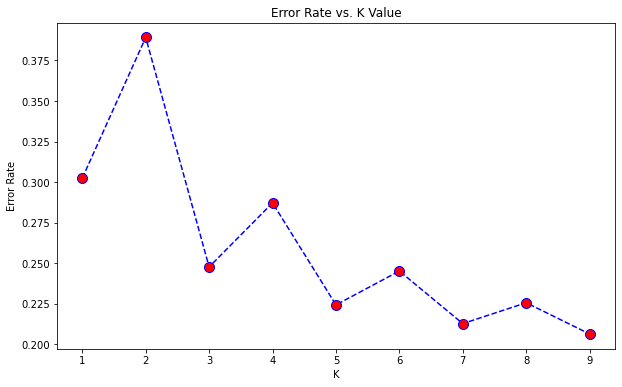

In [102]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x1_train,y1_train)
pred = knn.predict(x1_test)

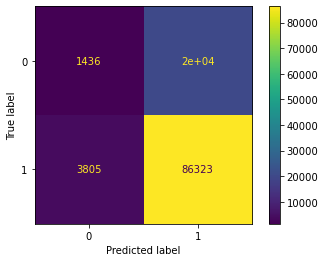

In [104]:
confusion_matrix_knn=confusion_matrix(y1_test,pred)
cm_display_knn = ConfusionMatrixDisplay(display_labels=knn.classes_,confusion_matrix=confusion_matrix_knn)

cm_display_knn.plot()
plt.show()

In [105]:
report_knn = classification_report(y1_test,pred)

In [106]:
#Here specificity should be higher because misclassification on 'charged off' label should be lower.It is more important

specificity = confusion_matrix_knn[0][0]/(confusion_matrix_knn[0][0]+confusion_matrix_knn[0][1])
specificity

0.06669143600222924

In [107]:
# By KNN the misclassification in fullypaid class is very high 
sensitivity = confusion_matrix_knn[1][1]/(confusion_matrix_knn[1][1]+confusion_matrix_knn[1][0])
sensitivity

0.9577822652227942

In [108]:
print('training score :', knn.score(x1_train, y1_train))
print("precision_score : ",precision_score(y1_test,pred))
print("recall_score : ",recall_score(y1_test,pred)) ## sensitivity
print("f1_score : ",f1_score(y1_test,pred))
print("accuracy_score : ",accuracy_score(y1_test,pred))

training score : 0.8112464325571342
precision_score :  0.8111615407023182
recall_score :  0.9577822652227942
f1_score :  0.8783954982777656
accuracy_score :  0.7859484148307362


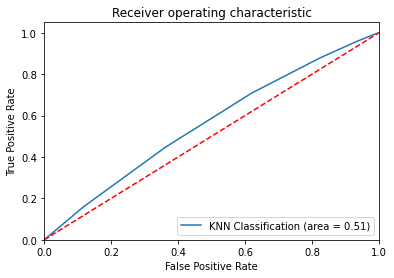

In [109]:
## AUC-ROC Curve (KNN Classifier)

knn_roc_auc=roc_auc_score(y_test,knn.predict(x1_test))
fpr,tpr,thresholds=roc_curve(y_test,knn.predict_proba(x1_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='KNN Classification (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

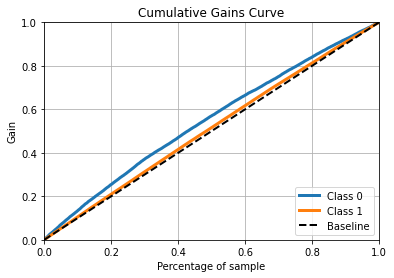

In [110]:
## Lift Curve
Knn_lift = knn.predict_proba(x1_test)
pcg(y1_test, Knn_lift)
plt.show()

### Decision Tree classifier

In [111]:
## Using Randomsearch cv
def random_search(model,X_train,Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=4,random_state=42,n_jobs=-1,error_score='raise') 
    random.fit(X_train,Y_train)
    print(random.best_params_)

In [112]:
# create DecisionTreeClassifier parameters dict for tuning
DTR_para_grid = {
            "splitter":["best","random"],
            "max_depth" : list(range(1,32)),
           "min_samples_leaf":np.linspace(0.1, 0.9, 9, endpoint=True),
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           }
random_search(DecisionTreeClassifier(),X_train,y_train,param_grid=DTR_para_grid)

{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.4, 'max_features': None, 'max_depth': 18}


In [113]:
dtree = DecisionTreeClassifier(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.4, 'max_features': None, 'max_depth': 18})
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

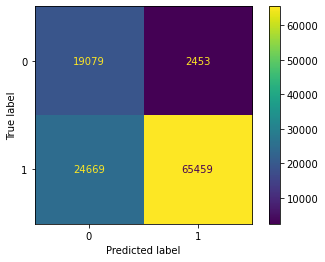

In [114]:
confusion_matrix_dt=confusion_matrix(y_test,y_pred)
cm_display_dt = ConfusionMatrixDisplay(display_labels=dtree.classes_,confusion_matrix=confusion_matrix_dt)

cm_display_dt.plot()
plt.show()

In [115]:
#Here specificity should be higher because misclassification on 'charged off' label should be lower.It is more important

specificity = confusion_matrix_dt[0][0]/(confusion_matrix_dt[0][0]+confusion_matrix_dt[0][1])
specificity

0.8860765372468884

In [116]:
sensitivity = confusion_matrix_dt[1][1]/(confusion_matrix_dt[1][1]+confusion_matrix_dt[1][0])
sensitivity

0.7262892774720398

In [117]:
print('training score :', dtree.score(X_train, y_train))
print("precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred)) ## sensitivity
print("f1_score : ",f1_score(y_test,y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

training score : 0.8230464248851802
precision_score :  0.9638797267051479
recall_score :  0.7262892774720398
f1_score :  0.8283852189319161
accuracy_score :  0.7571019165323303


In [118]:
report_dt = classification_report(y_test,y_pred)
print(report_dt)

              precision    recall  f1-score   support

           0       0.44      0.89      0.58     21532
           1       0.96      0.73      0.83     90128

    accuracy                           0.76    111660
   macro avg       0.70      0.81      0.71    111660
weighted avg       0.86      0.76      0.78    111660



In [119]:
## Checking overfitting in the model using CV score

k_folds = KFold(n_splits = 10)

scores = cross_val_score(dtree, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80813902 0.80943937 0.80491769 0.80993616 0.808488   0.80836978
 0.80757182 0.80636009 0.80754226 0.80461638]
Average CV Score:  0.8075380585882368
Number of CV Scores used in Average:  10


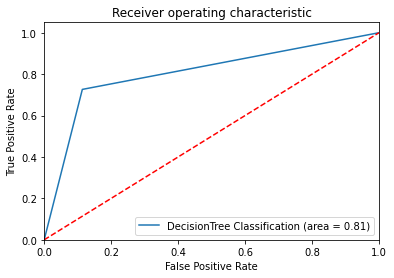

In [120]:
## AUC-ROC Curve (DecisionTree Classifier)

dt_roc_auc=roc_auc_score(y_test,dtree.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='DecisionTree Classification (area = %0.2f)' % dt_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

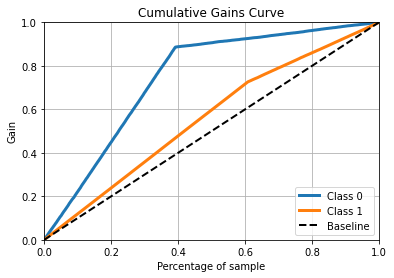

In [121]:
## Lift Curve
dt_lift = dtree.predict_proba(X_test)
pcg(y_test, dt_lift)
plt.show()

### random Forest Classifier

In [122]:
rf_para_grid = {'max_features': ['auto', 'sqrt'],
               'max_depth': list(range(1,32)),
               'min_samples_split': [2,3,5,8,10],
               'min_samples_leaf': np.linspace(0.1,0.5,5,endpoint=True),
               'bootstrap': [True, False]}

random_search(RandomForestClassifier(),X_train,y_train,param_grid=rf_para_grid)

{'min_samples_split': 8, 'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27, 'bootstrap': False}


In [123]:
rf = RandomForestClassifier(min_samples_split= 8, min_samples_leaf= 0.1, max_features= 'auto', max_depth= 27)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

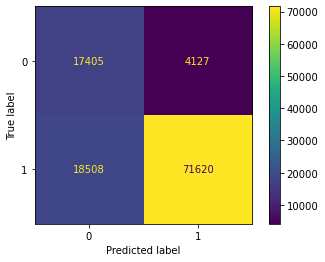

In [124]:
confusion_matrix_rf=confusion_matrix(y_test,y_pred)
cm_display_rf = ConfusionMatrixDisplay(display_labels=rf.classes_,confusion_matrix=confusion_matrix_rf)

cm_display_rf.plot()
plt.show()

In [125]:
specificity = confusion_matrix_rf[0][0]/(confusion_matrix_rf[0][0]+confusion_matrix_rf[0][1])
specificity

0.8083317852498607

In [126]:
sensitivity = confusion_matrix_rf[1][1]/(confusion_matrix_rf[1][1]+confusion_matrix_rf[1][0])
sensitivity

0.7946476122847506

In [127]:
print('training score :', rf.score(X_train, y_train))
print("precision_score : ",precision_score(y_test,y_pred))
print("recall_score : ",recall_score(y_test,y_pred)) ## sensitivity
print("f1_score : ",f1_score(y_test,y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

training score : 0.8455079650270598
precision_score :  0.945515994032767
recall_score :  0.7946476122847506
f1_score :  0.8635418236623965
accuracy_score :  0.7972864051585169


In [128]:
report_rf = classification_report(y_test,y_pred)
print(report_rf)

              precision    recall  f1-score   support

           0       0.48      0.81      0.61     21532
           1       0.95      0.79      0.86     90128

    accuracy                           0.80    111660
   macro avg       0.72      0.80      0.73    111660
weighted avg       0.86      0.80      0.81    111660



In [129]:
## Checking overfitting in the model using CV score

k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.80813902 0.80943937 0.80491769 0.80993616 0.808488   0.80836978
 0.80757182 0.80636009 0.80754226 0.80461638]
Average CV Score:  0.8075380585882368
Number of CV Scores used in Average:  10


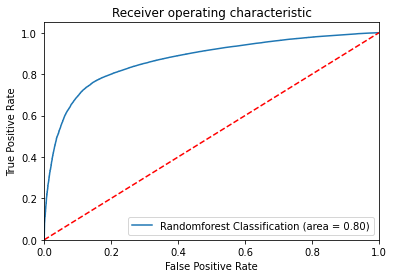

In [130]:
## AUC-ROC Curve RandomForest Classifier)

rf_roc_auc=roc_auc_score(y_test,rf.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Randomforest Classification (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

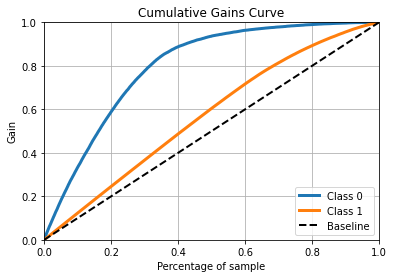

In [131]:
## Lift Curve
rf_lift = rf.predict_proba(X_test)
pcg(y_test, rf_lift)
plt.show()

In [132]:
## for logistic regression the accuracy score is highest
## we can check the most importnat features so that company can understand which customers can pay the loan fully
## important features

features = X.columns.to_list()
coefs = logis.coef_.tolist()[0]
feature_coef_df = pd.DataFrame({'Variable': features, 'Coeficient': coefs})
feature_coef_df.sort_values(by=['Coeficient'], ascending=False)[:10]

,Variable,Coeficient
80,emp_title,3.032447
71,Pin_Code_05113,1.755016
74,Pin_Code_29597,1.749005
81,title,1.205353
64,purpose_other,0.136254
66,purpose_small_business,0.111122
88,pub_rec_bankruptcies,0.111120
87,mort_acc,0.095893
41,emp_length_10+ years,0.093991
57,purpose_debt_consolidation,0.081961


These are the most important features and by these features The institution can understand the capability of loan applier (whether they can pay back the loan or their loan will be charged_off)

### Conclusion

By using Logistic Regression,GaussianNB,DecisionTree classifier,Randomforest classifier we can correctly classify the most important class (charged_off)with high accuracy.

So these models are well fitted for this problem.

the F1 score, overall accuracy of train and test data is also fair enough to correctly classify classes